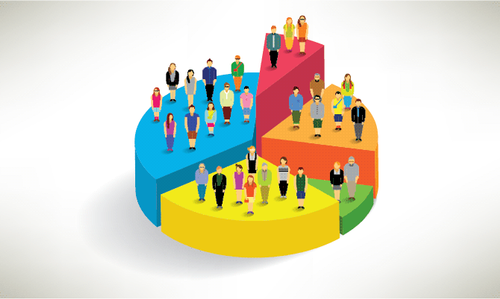



<p style="padding: 10px;
          color:#31A919;
          font-family:Verdana;
          text-align: center;
          font-size:190%;">
CRM Analytics

</p>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
What are CRM Analytics?

CRM analytics are data that demonstrate your company’s sales and customer service performance. CRM analytics also presents customer data that you can use to inform smarter business decisions. Typically, you’ll use CRM software to obtain CRM analytics and automate all your data collection and report generation.    
    
<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Benefits of CRM Analysis
    
The primary benefit of CRM analysis is that you can use it to inform your sales, customer service and marketing processes. You can use your CRM analytics to improve your methods via:

- **Customer service evaluations.** CRM analytics fill you in on your customer service team’s performance. If you see figures that your team could improve, implement practices that push your team toward these goals.
- **Accurate customer data.** Whether you’re using your customer data for demographic marketing or email marketing, you need to know whether you’re reaching the right person. CRM analysis ensures you’re doing just that.
- **Thorough customer analytics.** How much does your customer usually spend per quarter with you? Are they buying the same products time and time again, or does it vary? With CRM analytics, you’ll get firm answers to these questions, and you can use what you learn to refine your marketing strategies.
- **Efficient lead generation.** Your CRM analysis can tell you which of your marketing efforts most strongly correlate to purchases. If you see one approach correlating strongly to purchases but have only targeted a sliver of your customers with that approach, try that method more – your sales might increase.

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #31A919; background-color:#31A919; color:white; font-family:Verdana;font-size:120%;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Libraries and Utilities<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Load and Check Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Understanding Data<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Data Preprocessing<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">RFM Analysis<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Cohort Analysis<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:120%;">Customer Lifetime Value<span class="badge badge-primary badge-pill">7</span></a>

</div>
</div>
</div>

<a id = "1"></a>
    
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Libraries and Utilities</span>

In [2]:
!pip install plotly
!pip install Lifetimes
!pip install nb_black

     |████████████████████████████████| 584 kB 8.3 MB/s eta 0:00:01
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5279 sha256=ff166cd10a64bcbc02291254b61f70f02509b758dfac5d277e8986f5c0ba1872
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black


In [132]:
import os
import datetime
import squarify
import warnings
import pandas as pd 
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
%matplotlib inline
%load_ext nb_black
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<a id = "2"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Load and Check Data</span>

In [167]:
data = pd.read_csv('/kaggle/input/data-ecommerce/order_items_final.csv',parse_dates=['shipping_limit_date'],infer_datetime_format=True)

<IPython.core.display.Javascript object>

<a id = "3"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Understanding Data</span>


<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Context
    
This ecommerce data is part of the historical sales data from an ecommerce platform called "BookTheSurprise". The dataset contains 2 years data from product orders recieved on the site from 2019-10-10 to 2021-09-04. The dataset is maintained internally and has been modified slightly for public notebooks.

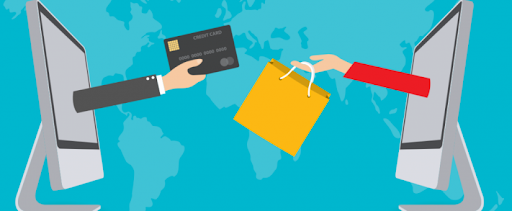

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
📃 Variable Description
    product_id	order_id	order_item_id	seller_id	shipping_limit_date	price	freight_value
- **product_id:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
- **order_id:** Product code that consists 5 digits.
- **order_item_quantity:** The quantities of each product per transaction.
- **shipping_limit_date:** The quantities of each product per transaction.
- **UnitPrice:** Product price per unit.
- **CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.
- **Country:** Name of the country where each customer resides.

In [168]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(data)

------------------------------- SHAPE --------------------------------
Rows: 3185
Columns: 6
------------------------------- TYPES --------------------------------
product_id                     object
order_id                       object
order_item_quantity             int64
shipping_limit_date    datetime64[ns]
price                         float64
customer_id                    object
dtype: object
-------------------------------- HEAD --------------------------------
                         product_id                          order_id  \
0  1e9e8ef04dbcff4541ed26657ea517e5  e17e4f88e31525f7deef66779844ddce   
1  3aa071139cb16b67ca9e5dea641aaa2f  5236307716393b7114b53ee991f36956   
2  96bd76ec8810374ed1b65e291975717f  01f66e58769f84129811d43eefd187fb   
3  cef67bcfe19066a932b7673e239eb23d  143d00a4f2dde4e0364ee1821577adb3   
4  9dc1a7de274444849c219cff195d0b71  86cafb8794cb99a9b1b77fc8e48fbbbb   

   order_item_quantity shipping_limit_date  price  \
0                    1 2021-04-

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Descriptive Statistics

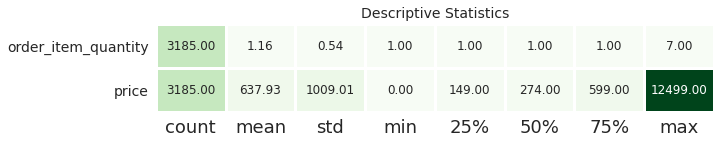

<IPython.core.display.Javascript object>

In [169]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Greens",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(data.select_dtypes(include = [float, int]))

📌  It is clearly seems that there are ouliters in order_item_quantity and price that have to be handled <br />
📌  Quantity and Unit Price should be multiplied in order to create **Total Price**.               


<a id = "4"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Data Preprocessing</span>

In [170]:
def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    
    '''
    Detects outliers with IQR method and replaces with thresholds 
    
    '''
    
    df_ = dataframe.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    df_.loc[(df_[variable] < low_limit), variable] = low_limit
    df_.loc[(df_[variable] > up_limit), variable] = up_limit
    
    return df_

def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy()
    
    #Missing Values
    df_ = df_.dropna()
    
    #Replacing Outliers
    df_ = replace_with_thresholds(df_, "order_item_quantity", q1 = 0.01, q3 = 0.99)
    df_ = replace_with_thresholds(df_, "price", q1 = 0.01, q3 = 0.99)
    
    #Total Price
    df_["TotalPrice"] = df_["order_item_quantity"] * df_["price"]
    
    return df_

<IPython.core.display.Javascript object>

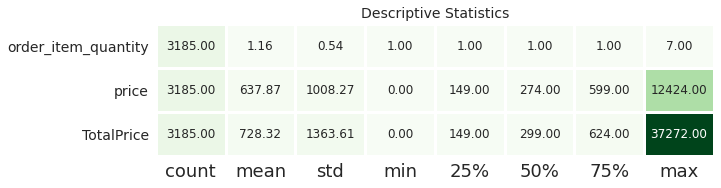

<IPython.core.display.Javascript object>

In [171]:
dataframe = ecommerce_preprocess(data)

desc_stats(dataframe.select_dtypes(include = [float, int]))

<a id = "5"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">RFM Analysis</span>

RFM stands for **Recency**, **Frequency**, and **Monetary** value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.   

RFM factors illustrate these facts:

- The more recent the purchase, the more responsive the customer is to promotions
- The more frequently the customer buys, the more engaged and satisfied they are
- Monetary value differentiates heavy spenders from low-value purchasers

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
RFM Metrics

In [172]:
today_date = dt.datetime(2021,12,11)

rfm = dataframe.groupby('customer_id').agg({'shipping_limit_date': lambda x: (today_date - x.max()).days,
                                    'product_id': lambda x: x.nunique(),
                                    'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm['monetary'] = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()

rfm.head()

,customer_id,recency,frequency,monetary
0,0013cd8e350a7cc76873441e431dd5ee,211,1,211.0
1,001b4e9b73aa98a6276b241bfd496822,237,1,237.0
2,002236c4f333bc8df6a5939749eb7869,315,1,315.0
3,002a10e899b62a460b0116e0b68697ad,214,1,214.0
4,0041d7b768cb115092fa0f5d55638d06,271,1,271.0


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
RFM Scores

In [173]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Segmentation

In [174]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,0013cd8e350a7cc76873441e431dd5ee,211,1,211.0,4,1,2,41,promising
1,001b4e9b73aa98a6276b241bfd496822,237,1,237.0,4,1,2,41,promising
2,002236c4f333bc8df6a5939749eb7869,315,1,315.0,3,1,3,31,about_to_sleep
3,002a10e899b62a460b0116e0b68697ad,214,1,214.0,4,1,2,41,promising
4,0041d7b768cb115092fa0f5d55638d06,271,1,271.0,3,1,3,31,about_to_sleep


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Segmentation Map

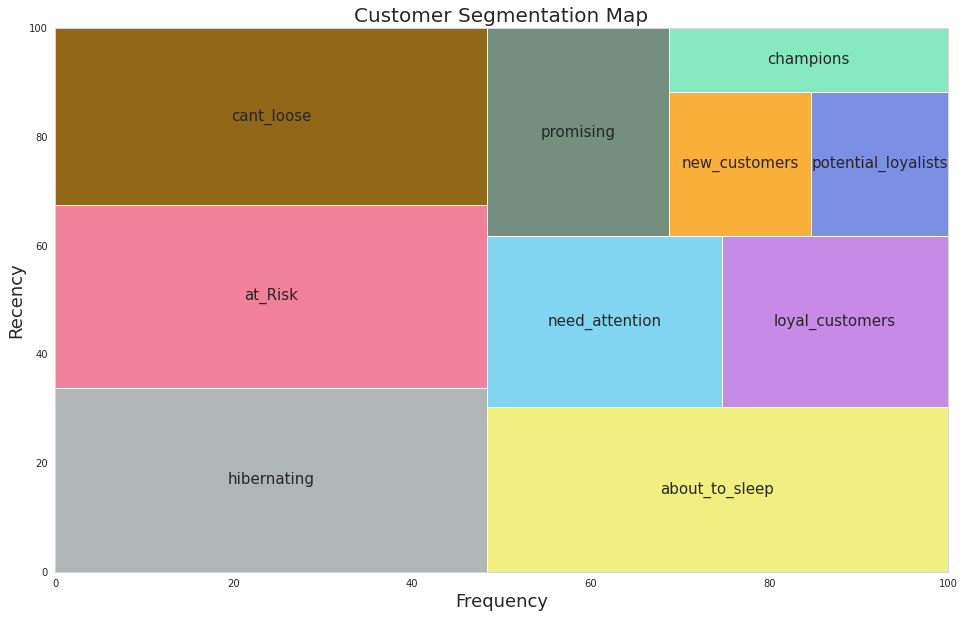

<IPython.core.display.Javascript object>

In [175]:
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Model Evaluation

In [176]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 2914
Number of Segments: 10
Silhouette Score: 0.466
Calinski Harabasz Score: 3078.673
Davies Bouldin Score: 0.683 


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Segment Analysis

In [177]:
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','std','max','min'})

recency                         monetary         \
                           mean  min  max        std        mean    min   
segment                                                                   
about_to_sleep       315.020747  266  370  30.837403  315.088608  266.0   
at_Risk              502.518828  371  792  87.252511  502.781971  371.0   
cant_loose           495.394737  371  788  85.999039  495.394737  371.0   
champions            146.788793   98  203  29.012063  146.952381   98.0   
hibernating          498.393407  371  792  87.597354  498.847345  371.0   
loyal_customers      272.458774  204  370  51.147664  271.867804  204.0   
need_attention       317.358491  269  369  31.393414  317.826923  269.0   
new_customers        148.554622   97  202  29.213329  148.554622   97.0   
potential_loyalists  188.736383  102  265  47.869024  188.736383  102.0   
promising            229.682927  204  265  17.840972  229.682927  204.0   

                                      frequency                    
                       max        std      mean min max       std  
segment                                                            
about_to_sleep       370.0  30.916450  1.000000   1   1  0.000000  
at_Risk              792.0  87.154038  1.000000   1   1  0.000000  
cant_loose           788.0  85.999039  1.000000   1   1  0.000000  
champions            203.0  28.967634  1.000000   1   1  0.000000  
hibernating          792.0  87.653223  1.000000   1   1  0.000000  
loyal_customers      370.0  50.888847  1.004228   1   2  0.064957  
need_attention       369.0  31.495860  1.000000   1   1  0.000000  
new_customers        202.0  29.213329  1.000000   1   1  0.000000  
potential_loyalists  265.0  47.869024  1.000000   1   1  0.000000  
promising            265.0  17.840972  1.000000   1   1  0.000000

<IPython.core.display.Javascript object>

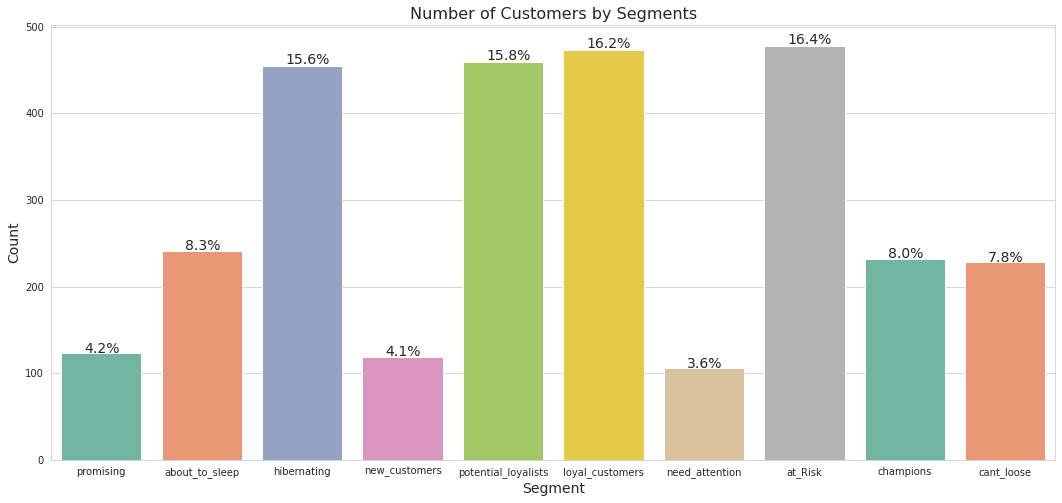

<IPython.core.display.Javascript object>

In [178]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

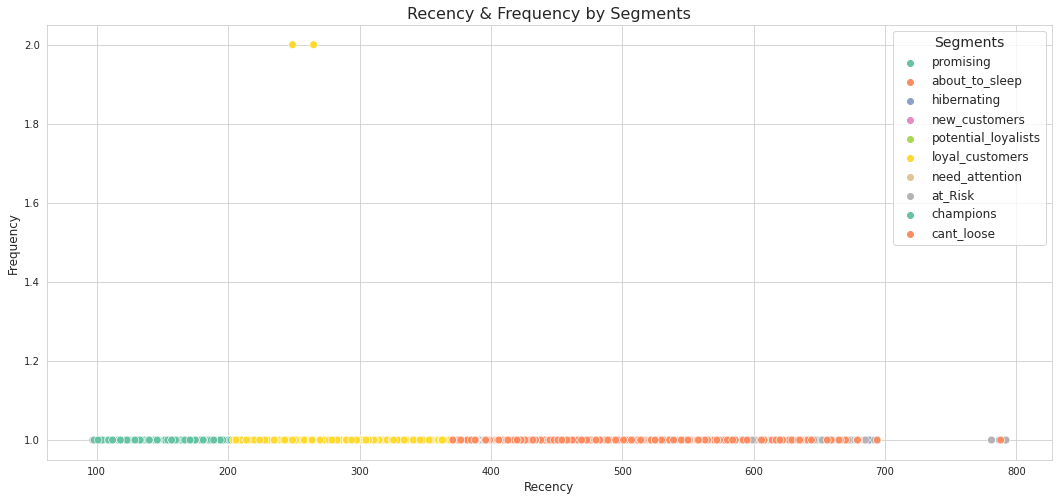

<IPython.core.display.Javascript object>

In [179]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

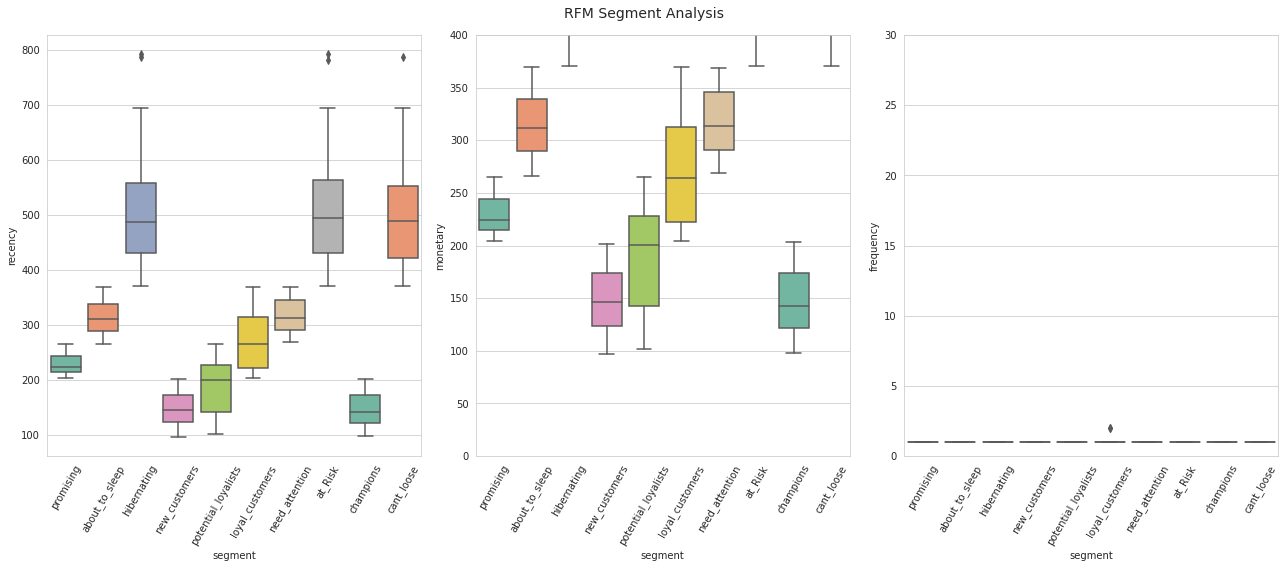

<IPython.core.display.Javascript object>

In [180]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

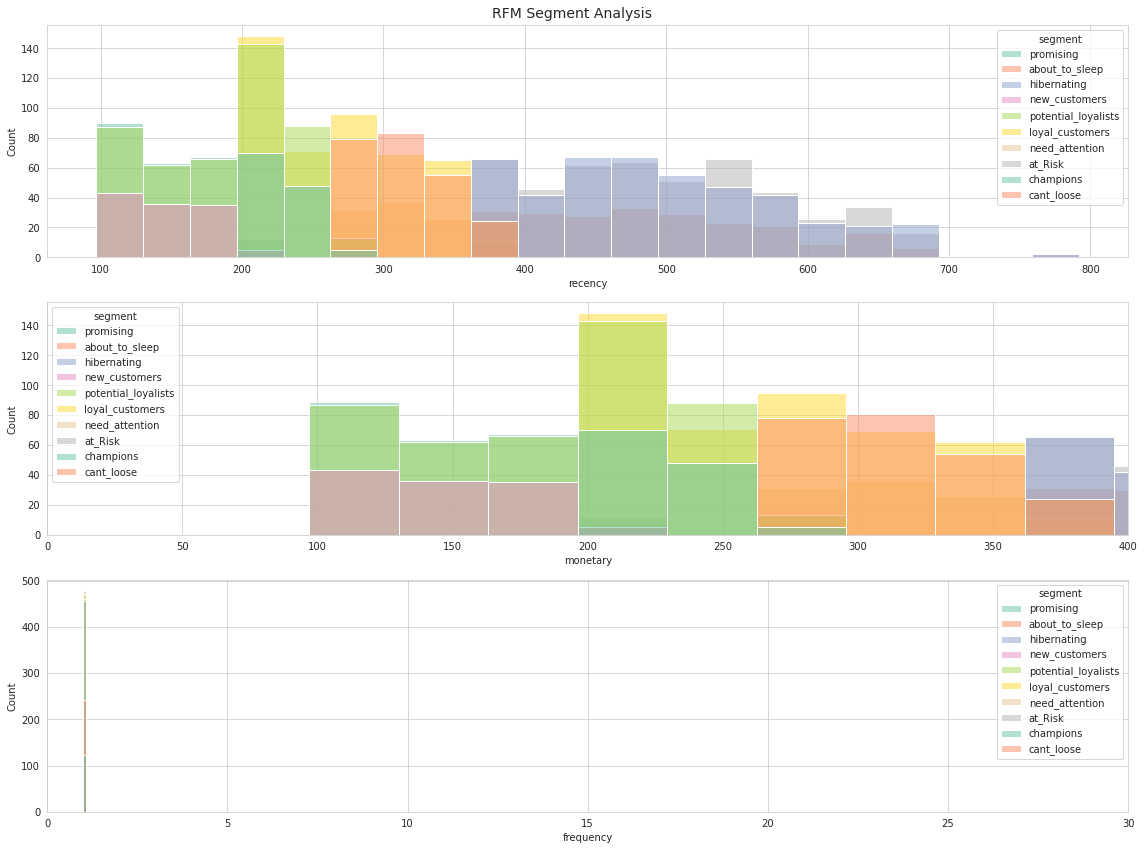

<IPython.core.display.Javascript object>

In [181]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

<a id = "6"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Cohort Analysis</span>

A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

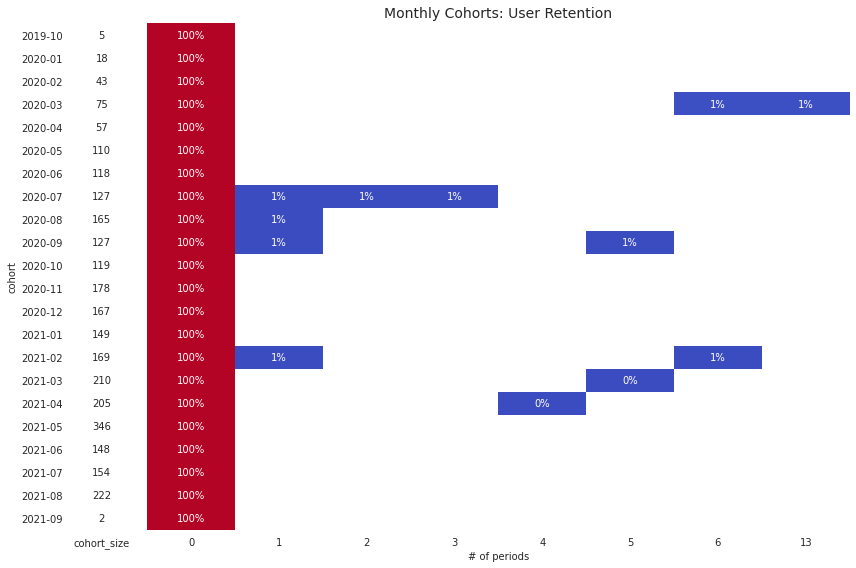

<IPython.core.display.Javascript object>

In [184]:
def CohortAnalysis(dataframe):

    data = dataframe.copy()
    data = data[["customer_id", "product_id", 'shipping_limit_date']].drop_duplicates()
    data["order_month"] = data['shipping_limit_date'].dt.to_period("M")
    data["cohort"] = (
        data.groupby("customer_id")['shipping_limit_date'].transform("min").dt.to_period("M")
    )
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("customer_id", "nunique"))
        .reset_index(drop=False)
    )
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()
    
CohortAnalysis(df)

<a id = "7"></a>
<span style=" font-family:Verdana; font-size:190%; color:#31A919; ">Customer Lifetime Value</span>

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In [186]:
cltv_df = dataframe.groupby("customer_id").agg(
    {
        'shipping_limit_date': [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "product_id": "nunique",
        "TotalPrice": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

,recency,T,frequency,monetary
customer_id,,,,
0013cd8e350a7cc76873441e431dd5ee,0,211,1,124.0
001b4e9b73aa98a6276b241bfd496822,0,237,1,324.0
002236c4f333bc8df6a5939749eb7869,0,315,1,249.0
002a10e899b62a460b0116e0b68697ad,0,214,1,274.0
0041d7b768cb115092fa0f5d55638d06,0,271,1,1249.0


<IPython.core.display.Javascript object>

In [187]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
BG/NBD
    
Beta Geometric / Negative Binomial Distribution models assume that the number of transactions made by each customer follows a Poisson process with a heterogeneity in transaction rates across customers following a **gamma distribution**. These assumptions give us a Negative binomial distribution (NBD) for modeling the number of transactions made by the customer while he is alive. We can build BG/NBD model by using <code>BetaGeoFitter</code> and <code>lifetimes</code> packages.

In [188]:
BGF = BetaGeoFitter(penalizer_coef=0.001)  # avoid overfitting

BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 2 subjects, a: 3.78, alpha: 1.43, b: 4.95, r: 0.59>

<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Top 10 Expected Number of Transaction (1 Week)

In [189]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,customer_id,Expected Number of Transactions
0,7cbaa85e0ebac50c20576511d07df810,0.008532
1,487ed3b1b98379e4aa9ce58cf75c51be,0.000139


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Top 10 Expected Number of Transaction (1 Month)

In [190]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,customer_id,Expected Number of Transactions
0,7cbaa85e0ebac50c20576511d07df810,0.033430
1,487ed3b1b98379e4aa9ce58cf75c51be,0.000533


<IPython.core.display.Javascript object>

<span style="color:#31A919;
             font-size:160%;
             font-family:Verdana;">
Frequency of Repeat Transactions

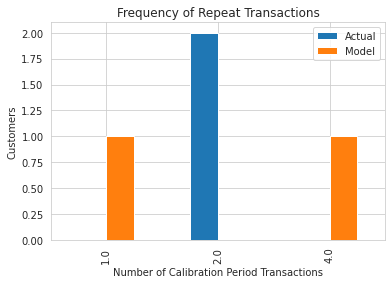

<IPython.core.display.Javascript object>

In [191]:
# Plot a figure with period actual and predicted transactions.
plot_period_transactions(BGF, max_frequency=7)
plt.show()

<span style="color:#31A919;
             font-size:140%;
             font-family:Verdana;">
Conclusion

<span style="color:#31A919;
             font-size:140%;
             font-family:Verdana;">
If you have any suggestions or questions, feel free to comment!

<span style="color:#31A919;
             font-size:140%;
             font-family:Verdana;">
Best Wishes!